In [1]:
# from pathlib import Path

# repository_path = Path('..').resolve()

# !pip install -Uqq {repository_path}
# %pip install -e ..
    


# !export PYTHONPATH=$PYTHONPATH:{repository_path}
# !echo $PYTHONPATH

<a target="_blank" href="https://colab.research.google.com/github/Luan-vP/glider/blob/main/walkthrough.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [2]:
import glider.visualize as visualize
import glider.vehicle as vehicle

import mediapy as media

This is a genetic algorithm to optimise a glider form.

That means we put a population of gliders through a test and see which perform the best. The best candidates have offspring, which make up the next generation.

The best gliders of that generation have offspring and so on, until we have a set of gliders that are performing pretty well on our test.


# The Gliders

Gliders are a combination of points and faces that make up a polygon. They look like this:

""

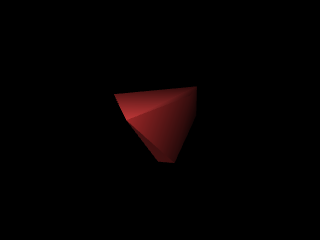

In [3]:
v = vehicle.Vehicle(
    num_vertices=10,
    max_dim_m=5,
    )
media.show_image(visualize.view_vehicle(*v.create_glider_from_vertices()))

# The Test

The test is a drop from 80m, and the score is determined by how far the glider moves to the right (the positive x direction) before it touches the landing platform.

The simulation is done using the open source Physics simulator Mujoco, developed by DeepMind.

A test for the glider above, looks like this:

In [4]:
import mujoco

import glider.simulation as simulation

test_xml_representation = simulation.drop_test_glider(
    *v.create_glider_from_vertices()
)

model = mujoco.MjModel.from_xml_string(test_xml_representation)
data = mujoco.MjData(model)


visualize.render_to_collision(model, data, camera_name="fixed", show=True)

[array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [229, 229, 229],
         [229, 229, 229],
         [228, 228, 228]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [229, 229, 229],
         [229, 229, 229],
         [229, 229, 229]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [230, 230, 230],
         [229, 229, 229],
         [229, 229, 229]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
  

 different reproduction modes:
- Mutation
- Cloning
- Cross-over

The first mode, mutation, creates offspring that vary according to the MUTATION_RATIO, here 5%. 

Let's try it out!

""

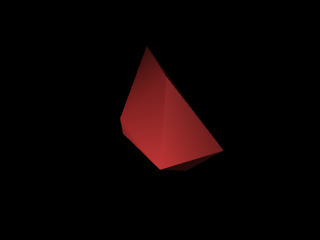

""

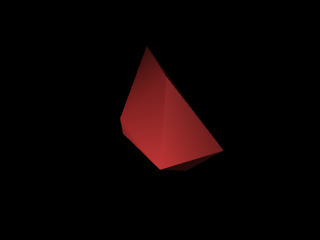

In [5]:
v = vehicle.Vehicle(
    num_vertices=10,
    max_dim_m=5,
    )
media.show_image(visualize.view_vehicle(*v.create_glider_from_vertices()))

v2 = vehicle.Vehicle(
    vertices=v.mutate(),
)
media.show_image(visualize.view_vehicle(*v2.create_glider_from_vertices()))

These will be similar to the parents, but not the same, allowing us to whittle into adjacent niches.

In [6]:
from glider.optimization import iterate_population, fitness_func
from glider.visualize import view_vehicle

frames = []

population = [] 
for i in range(300):
    population = iterate_population(
        population,
        population_size = 100,
        survival_weight = 0.4,
        cloning_weight = 0.4,
    )

    if i % 10 == 0:
        print("Iteration:", i)
        winning_genes = population[0]
        print("Fitness:", fitness_func(winning_genes))
        # vehicle.Vehicle(vertices=winning_genes).show()
        frames.append(view_vehicle(*vehicle.Vehicle(vertices=winning_genes).create_glider_from_vertices()))


TypeError: iterate_population() got an unexpected keyword argument 'population_size'

In [ ]:
media.show_video(frames, fps=3)

""

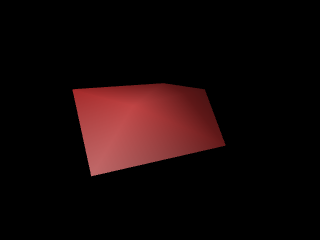

In [ ]:
v = vehicle.Vehicle(vertices=population[0])
v.show()

In [ ]:
import glider.simulation as sim

glider_xml, glider_asset = v.create_glider_from_vertices()
world_xml = sim.drop_test_glider(glider_xml, glider_asset)

from pathlib import Path

p = Path('../assets/worlds/drop_test.xml').resolve()
p.parent.mkdir(parents=True, exist_ok=True)

with open('../assets/worlds/drop_test.xml', 'w') as f:
    f.write(world_xml)